<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [48]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

import warnings
warnings.simplefilter('ignore')


import numpy as np
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta   


import bayes

In [136]:
# datos
#cokdf=pd.read_csv("data/cookie_cats.csv")
test=pd.read_csv("data/test.csv")
control=pd.read_csv("data/control.csv")
test

,Unnamed: 0,Unnamed: 0.1,Tiempo_Control(sec),Clicks,Edad,Sexo,Bool_test
0,0,0,190,8,42,M,False
1,1,1,42,10,21,F,True
2,2,2,70,7,50,F,True
3,3,3,65,10,35,M,True
4,4,4,85,9,40,M,False
5,5,5,70,7,68,F,True
6,6,6,80,6,59,M,True
7,7,7,28,15,39,F,True
8,8,8,44,8,38,F,True
9,9,9,72,13,34,M,True


In [118]:
 len(control["Bool_control"]), sum(control["Bool_control"]),    len(test["Bool_test"]), sum(test["Bool_test"])

(15, 10, 15, 12)

### CR: CONVERSION RATES 


In [167]:
# CR: CONVERSION RATES - RETENTION 1:

imps_ctrl = 15
convs_ctrl = 10

imps_test = 15
convs_test = 12

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.6666666666666666, Test: 0.8'

In [168]:
# a prioris

a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [169]:
beta_control.mean(), beta_test.mean()


(0.6470588235294118, 0.7647058823529411)

In [183]:
x = np.linspace(0.2, 1.3, 100)

def plot(betas, nombres):
    colors = ['purple', "grey"]  # Define colors here or use any other color list
    
    for i, (bet, nom) in enumerate(zip(betas, nombres)):
        y = bet.pdf(x)
        y_media = bet.mean()
        y_std = bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.2f} $\pm$ {:.4f}'.format(nom, y_media, y_std),
                 color=colors[i % len(colors)], linewidth=4)  # Assign colors based on index
        
        plt.yticks([])
    plt.savefig('output_plot.png', dpi=300, bbox_inches='tight') 
    plt.legend()
    plt.show()


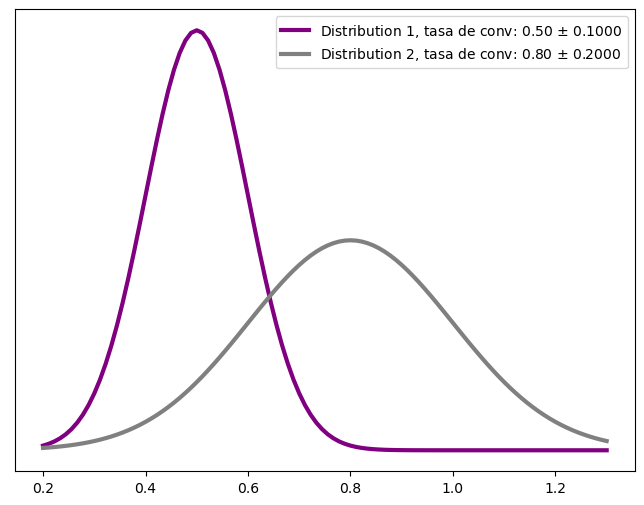

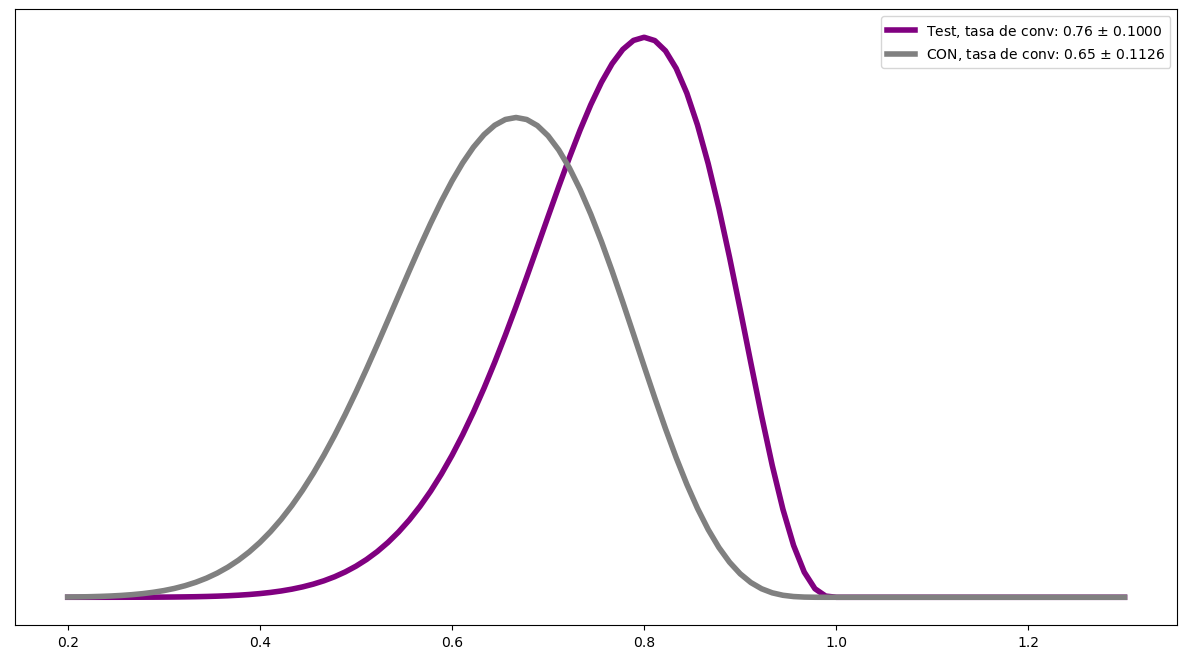

In [184]:
plot([beta_test, beta_control], ['Test', 'CON'])


In [173]:
salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

0.18181818181818168

In [174]:


bayes.calc_prob(beta_test, beta_control)

0.7834260289210313

In [175]:
1 - beta_test.cdf(0.15)

0.9999999930477168

## Conclusión

Nuestro equipo de UX estima que el nuevo diseño de **la web mejorará nuestra tasa de conversion (CR) en un 15%.**

A partir de ensayos en versiones web anteriores, sabemos que **a partir de los 80 segundos baja drásticamente el interés de compra.** Por tanto, en el estudio presente, hemos definido que la conversión de compra se produce antes de 80 segundos.

Para ello hemos llevado a cabo un estudio de mercado en un **total de 30 clientes**, divididos en dos grupos iguales para evaluar el diseño web control y test. 

Con los datos recogidos, hemos realizado un **A-B Test bayesiano** (Beta-Binomial) y hemos obtenido las siguientes conclusiones:


* Si cambiamos el diseño web, tenemos un 0.99999999% de probabilidad de mejorar el CR (conversión rate) en un más de un 15%
* Además, con una probabilidad de 78.3%, la web podría mejorar la tasa la de conversion hasta un 18.88%  

